# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [94]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns


# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [95]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?

<font color='steelblue'>Grocery category</font>
* Any categorical data to convert?

<font color='steelblue'>Nope</font>
* Any missing data to remove?

<font color='steelblue'>Nope</font>

* Column collinearity - any high correlations?

<font color='steelblue'>Grocery & Detergents paper 🤔</font>
* Descriptive statistics - any outliers to remove?

<font color='steelblue'>Looks like there are some outliers</font>

* Column-wise data distribution - is the distribution skewed?

<font color='steelblue'>All columns are right skewed</font>

* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

<font color='steelblue'>Not happening </font>

In [96]:
# 2
customers.info()
#3
customers.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

## Correlation

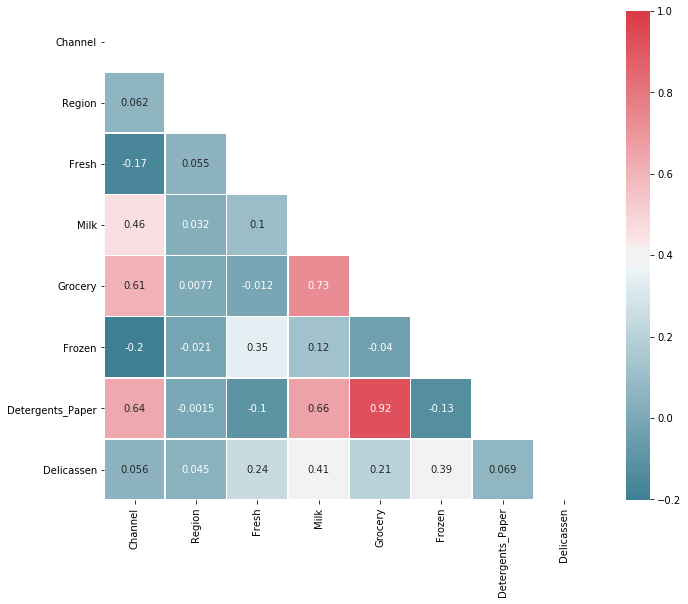

In [97]:
#4

# Compute the correlation matrix
corr = customers.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, linewidths=.5,annot = True )

In [98]:
 corr.abs().unstack().sort_values(ascending=False)[len(corr):]

Grocery           Detergents_Paper    0.924641
Detergents_Paper  Grocery             0.924641
Milk              Grocery             0.728335
Grocery           Milk                0.728335
Detergents_Paper  Milk                0.661816
Milk              Detergents_Paper    0.661816
Channel           Detergents_Paper    0.636026
Detergents_Paper  Channel             0.636026
Channel           Grocery             0.608792
Grocery           Channel             0.608792
Channel           Milk                0.460720
Milk              Channel             0.460720
Delicassen        Milk                0.406368
Milk              Delicassen          0.406368
Frozen            Delicassen          0.390947
Delicassen        Frozen              0.390947
Frozen            Fresh               0.345881
Fresh             Frozen              0.345881
Delicassen        Fresh               0.244690
Fresh             Delicassen          0.244690
Grocery           Delicassen          0.205497
Delicassen   

## Checking for outliers

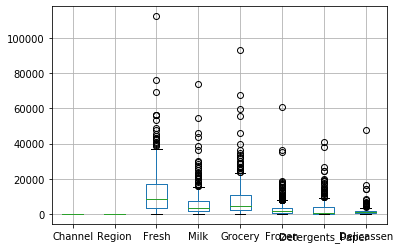

In [99]:
customers.boxplot()
plt.show()

In [100]:
customers.drop(['Channel','Region'], inplace=True, axis=1)

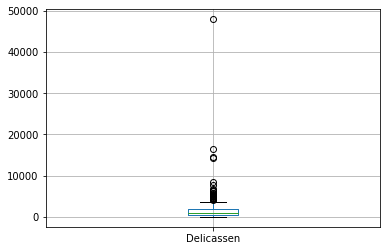

In [101]:
customers[['Delicassen']].boxplot()
plt.show()

In [102]:
from scipy import stats
# Interesting article on how to deal with outliers
# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba


## With IQR Score 

In [103]:
Q1 = customers.quantile(0.25)
Q3 = customers.quantile(0.75)
IQR = Q3 - Q1

customers_iqr_outliers = ((customers < (Q1 - 1.5 * IQR)) | (customers > (Q3 + 1.5 * IQR)))
customers_iqr_outliers.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,True
3,False,False,False,False,False,False
4,False,False,False,False,False,True


### Percentage of outliers per column

In [104]:
cols = customers_iqr_outliers.columns
{col:round(customers_iqr_outliers[col].value_counts()[True]*100/customers_iqr_outliers[col].count(),2) for col in cols}

{'Fresh': 4.55,
 'Milk': 6.36,
 'Grocery': 5.45,
 'Frozen': 9.77,
 'Detergents_Paper': 6.82,
 'Delicassen': 6.14}

### Rows with outliers

In [105]:
row_outlier = ((customers < (Q1 - 1.5 * IQR)) | (customers > (Q3 + 1.5 * IQR))).any(axis=1)
customers[~row_outlier]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
3,13265,1196,4221,6404,507,1788
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...
432,21117,1162,4754,269,1328,395
433,1982,3218,1493,1541,356,1449
434,16731,3922,7994,688,2371,838
438,10290,1981,2232,1038,168,2125


## WIth Zscore

In [106]:
stats.zscore(customers)

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [107]:
np.abs(stats.zscore(customers)) < 3

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       ...,
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [108]:
customers[(np.abs(stats.zscore(customers)) < 3).all(axis=1)].shape

(414, 6)

### Zscore method deletes less rows so I keep it

In [109]:
customers = customers[(np.abs(stats.zscore(customers)) < 3).all(axis=1)]

In [110]:
customers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


## Skewness

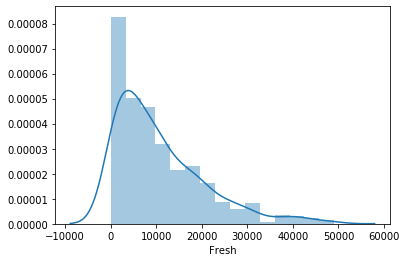

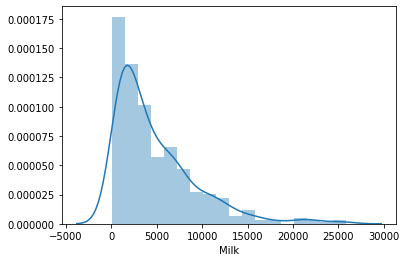

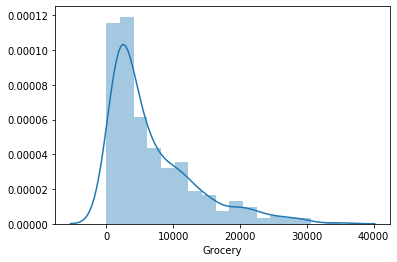

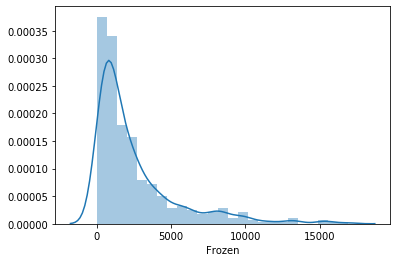

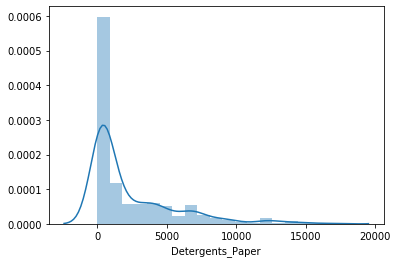

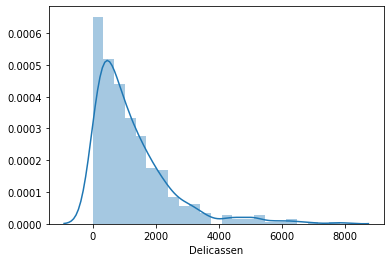

In [111]:
for col in customers.columns:
    sns.distplot(customers[col])
    plt.show()


## Paretto principle

In [178]:
top_20 = round(customers.shape[0]*.2)
total = customers.sum().sum()
sorted_by_sales = customers.sum(axis=1).sort_values(ascending=False)

# Testing if I have all the data
# rest_80_sales = sorted_by_sales[top_20:].sum()
# rest_80_sales/total

top_20_sales = sorted_by_sales[:top_20].sum()

print('20% of all customers account for',round(top_20_sales/total*100,2),'% of the sales' )

20% of all customers account for 37.29 % of the sales


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [179]:
customers.head()
# I did the cleaning in the cells above

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [181]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers)

In [183]:
customers_scale

array([[ 0.19956882,  1.05140907,  0.11583669, -0.80184394,  0.09379788,
         0.08229138],
       [-0.37265498,  1.08525403,  0.42707868, -0.27046195,  0.28694383,
         0.44251008],
       [-0.44443787,  0.86504201,  0.13491131, -0.04973933,  0.3565263 ,
         5.43293721],
       ...,
       [ 0.38942639,  2.33312218,  3.63332091, -0.72529472,  3.89025473,
         0.51735004],
       [-0.04300432, -0.63534473, -0.71057515, -0.51898944, -0.6881468 ,
         0.72953365],
       [-0.80804266, -0.69754034, -0.66746341, -0.85299117, -0.59172984,
        -0.97533705]])

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [188]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(customers_scale)
kmeans.labels_
# kmeans.cluster_centers_


array([2, 1, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 2, 2, 2,
       0, 1, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0,
       0, 2, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 2,
       2, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2,
       0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2,
       0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 0, 0, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,

Count the values in `labels`.

In [189]:
customers['Labels'] = kmeans.labels_
customers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,1
438,10290,1981,2232,1038,168,2125,2


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [194]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.5)
clustering.fit(customers_scale)

customers["labels_DBSCAN"] = clustering.labels_

In [195]:
customers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels,labels_DBSCAN
0,12669,9656,7561,214,2674,1338,2,-1
1,7057,9810,9568,1762,3293,1776,1,-1
2,6353,8808,7684,2405,3516,7844,1,-1
3,13265,1196,4221,6404,507,1788,0,-1
4,22615,5410,7198,3915,1777,5185,0,-1
...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0,-1
436,39228,1431,764,4510,93,2346,0,-1
437,14531,15488,30243,437,14841,1867,1,-1
438,10290,1981,2232,1038,168,2125,2,-1


Count the values in `labels_DBSCAN`.

In [196]:
customers['labels_DBSCAN'].count()

414

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

In [226]:
def sns_subplots(x,y):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    plt.sca(ax[0])
    sns.scatterplot(x=x, y=y, hue="Labels",data=customers)

    plt.sca(ax[1])
    sns.scatterplot(x="Detergents_Paper", y="Milk", hue="labels_DBSCAN",data=customers)

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

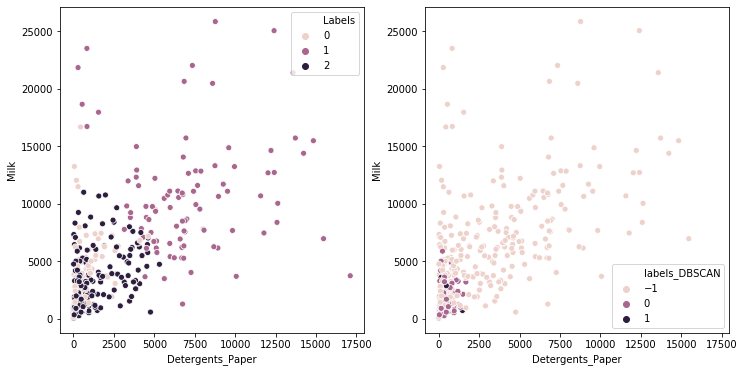

In [227]:
sns_subplots('Detergents_Paper','Milk')

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

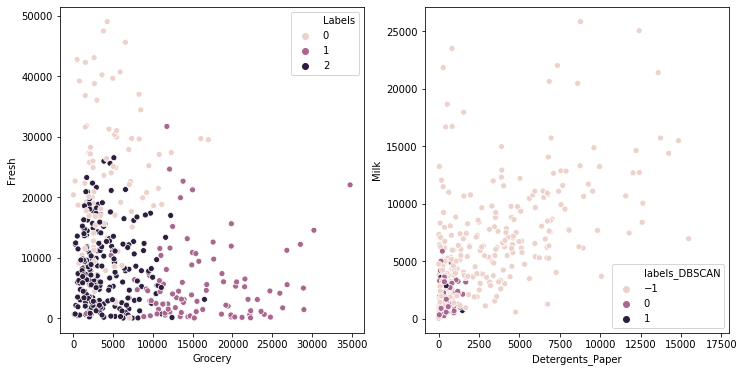

In [228]:
sns_subplots('Grocery','Fresh')

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

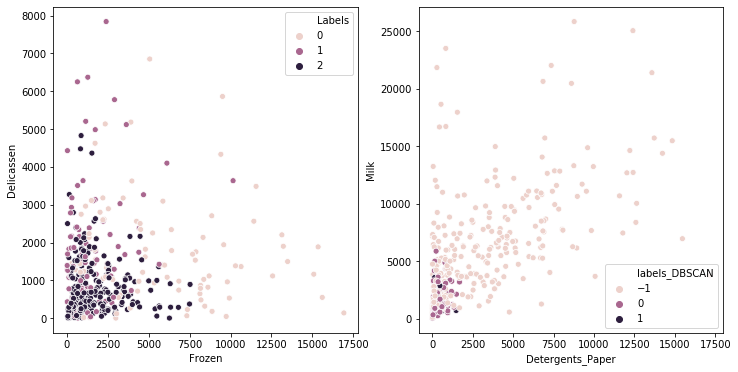

In [230]:
sns_subplots('Frozen','Delicassen')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [253]:
customers.groupby('Labels').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
Labels,,,,,,,
0,22854.238636,3816.829545,4572.272727,5914.511364,781.090909,1742.056818,-0.931818
1,5765.968421,10671.915789,16153.989474,1502.189474,7092.031579,1768.063158,-1.000000
2,8120.034632,2888.580087,3826.948052,1699.017316,1039.419913,827.878788,-0.441558


In [240]:
customers.groupby('labels_DBSCAN').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
labels_DBSCAN,,,,,,,
-1,11672.993197,6190.724490,8727.568027,2939.180272,3184.462585,1487.163265,1.098639
0,6644.238095,1650.952381,2071.580952,1440.076190,379.961905,601.409524,2.000000
1,20344.200000,1570.133333,2506.200000,2688.733333,430.466667,808.866667,1.600000


Which algorithm appears to perform better?


<font color='steelblue'>KMeans? Means are more spred out and in the plots its easier to cluster</font>

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [26]:
# Your code here

In [27]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [28]:
# Your code here

In [29]:
# Your comment here